In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Nulos y duplicados

In [5]:
print("Duplicados:", df.duplicated().sum())
na = df.isna().sum()    
print("NA totales:", int(na.sum()))
display(na[na>0].sort_values(ascending=False))

Duplicados: 1081
NA totales: 0


Series([], dtype: int64)

### Separar numéricas y objetivo

In [6]:
numeric_cols = [c for c in df.columns if c not in ["Class"]]
target_col = "Class"
print("Numéricas:", len(numeric_cols))
print("Objetivo:", target_col)

Numéricas: 30
Objetivo: Class


# Graficas

### Conteo y proporción

,conteo,proporcion
Class,,
0,284315,0.998273
1,492,0.001727


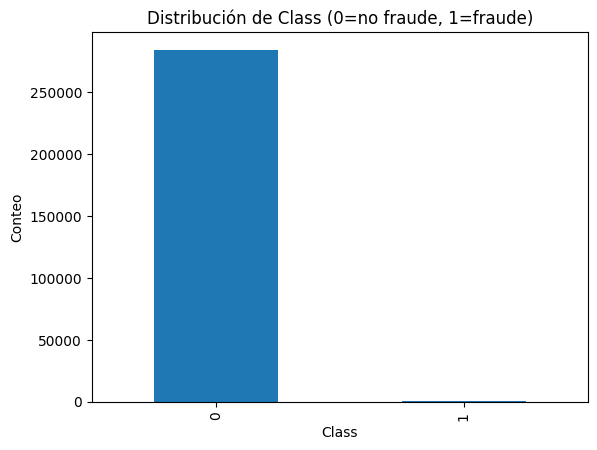

In [7]:
vc = df[target_col].value_counts().sort_index()
prop = (vc / vc.sum()).round(6)
display(pd.DataFrame({"conteo": vc, "proporcion": prop}))

vc.plot(kind="bar")
plt.title("Distribución de Class (0=no fraude, 1=fraude)")
plt.xlabel("Class")
plt.ylabel("Conteo")
plt.show()

### Histograma de Amount 

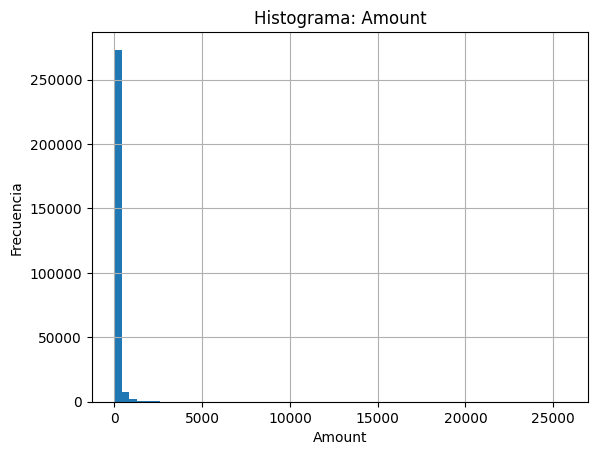

In [8]:
plt.figure()
df["Amount"].hist(bins=60)
plt.title("Histograma: Amount")
plt.xlabel("Amount")
plt.ylabel("Frecuencia")
plt.show()

### Log(Amount+1) para colas largas

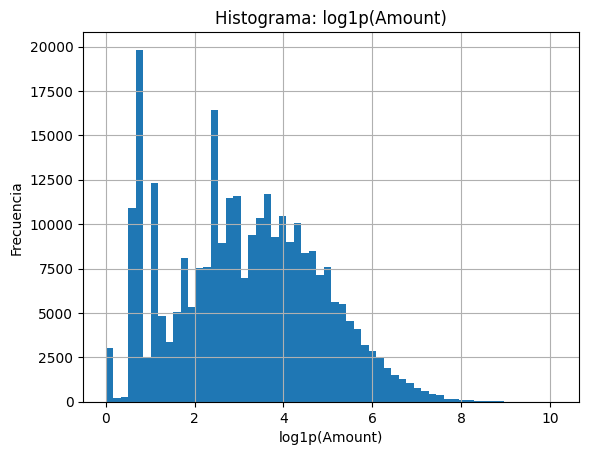

In [9]:
plt.figure()
np.log1p(df["Amount"]).hist(bins=60)
plt.title("Histograma: log1p(Amount)")
plt.xlabel("log1p(Amount)")
plt.ylabel("Frecuencia")
plt.show()

### Time está en segundos desde la primera transacción. Útil ver por horas.

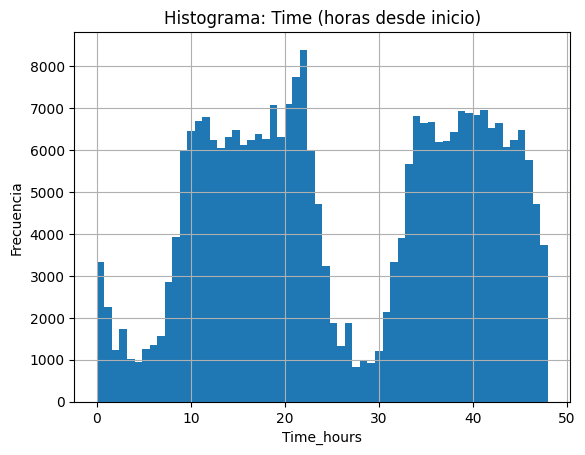

In [10]:
df["Time_hours"] = df["Time"] / 3600.0

plt.figure()
df["Time_hours"].hist(bins=60)
plt.title("Histograma: Time (horas desde inicio)")
plt.xlabel("Time_hours")
plt.ylabel("Frecuencia")
plt.show()

### Patrón circadiano approx (mod 24)

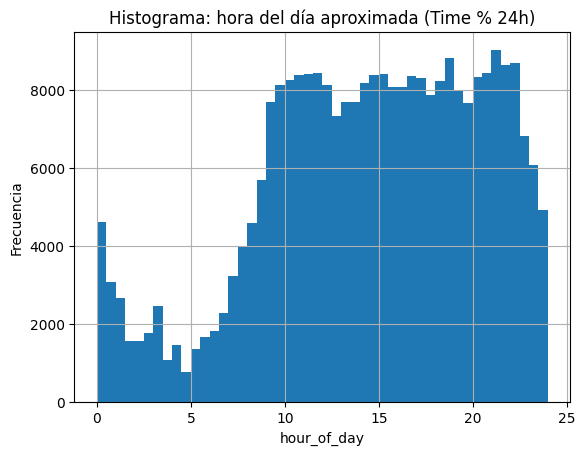

In [11]:
df["Time_hour_of_day"] = (df["Time_hours"] % 24).round(2)
plt.figure()
df["Time_hour_of_day"].hist(bins=48)
plt.title("Histograma: hora del día aproximada (Time % 24h)")
plt.xlabel("hour_of_day")
plt.ylabel("Frecuencia")
plt.show()

## Matriz de correlacion

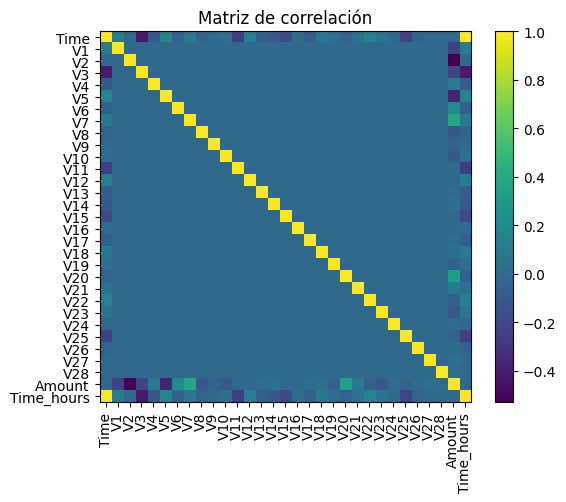

Class               1.000000
V11                 0.154876
V4                  0.133447
V2                  0.091289
V21                 0.040413
V19                 0.034783
V20                 0.020090
V8                  0.019875
V27                 0.017580
V28                 0.009536
Amount              0.005632
V26                 0.004455
V25                 0.003308
V22                 0.000805
V23                -0.002685
V15                -0.004223
V13                -0.004570
V24                -0.007221
Time               -0.012323
Time_hours         -0.012323
Time_hour_of_day   -0.017083
V6                 -0.043643
V5                 -0.094974
V9                 -0.097733
V1                 -0.101347
V18                -0.111485
V7                 -0.187257
V3                 -0.192961
V16                -0.196539
V10                -0.216883
V12                -0.260593
V14                -0.302544
V17                -0.326481
Name: Class, dtype: float64

In [12]:
corr_cols = [c for c in df.columns if c not in [target_col, "Time_hour_of_day"]]
corr = df[corr_cols].corr(numeric_only=True)

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.title("Matriz de correlación")
plt.colorbar()
plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.tight_layout()
plt.show()

corr_with_class = df.corr(numeric_only=True)[target_col].sort_values(ascending=False)
corr_with_class

### Relación Amount y Time vs Class

,Amount,Time,Time_hours,Time_hour_of_day
Class,,,,
0,22.00,84711.0,23.530833,15.010
1,9.25,75568.5,20.991250,12.055


<Figure size 640x480 with 0 Axes>

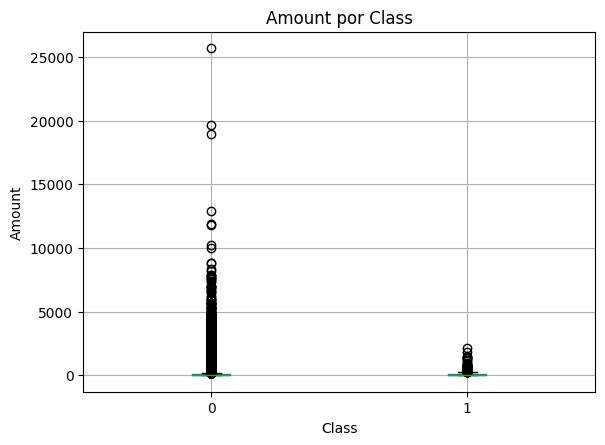

<Figure size 640x480 with 0 Axes>

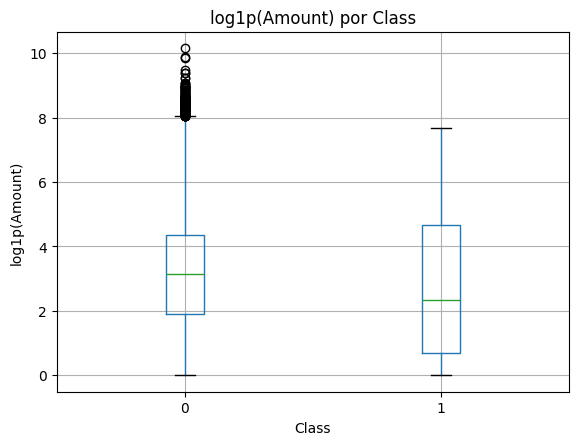

In [13]:
# Medianas por clase
display(df.groupby(target_col)[["Amount","Time","Time_hours","Time_hour_of_day"]].median())

for col in ["Amount"]:
    plt.figure()
    df.boxplot(column=col, by=target_col)
    plt.title(f"{col} por Class")
    plt.suptitle("")
    plt.xlabel("Class")
    plt.ylabel(col)
    plt.show()

    plt.figure()
    df["logAmount"] = np.log1p(df["Amount"])
    df.boxplot(column="logAmount", by=target_col)
    plt.title(f"log1p({col}) por Class")
    plt.suptitle("")
    plt.xlabel("Class")
    plt.ylabel(f"log1p({col})")
    plt.show()


### Outliers (IQR) top variables

In [14]:
def iqr_outlier_fraction(s):
    x = s.dropna().values
    if x.size == 0:
        return np.nan
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return np.mean((x < lower) | (x > upper))


outlier_frac = {
    c: iqr_outlier_fraction(df[c]) for c in numeric_cols if df[c].notna().any()
}
rank = pd.Series(outlier_frac).sort_values(ascending=False)
print("Top columnas con mayor fracción de outliers:")
display(rank.head(15).to_frame("fraccion_outliers"))


Top columnas con mayor fracción de outliers:


,fraccion_outliers
V27,0.137507
Amount,0.112020
V28,0.106535
V20,0.097505
V8,0.084738
V6,0.080634
V23,0.065100
V12,0.053889
V21,0.050901
V14,0.049679


### Top 4 de OUTLIERS

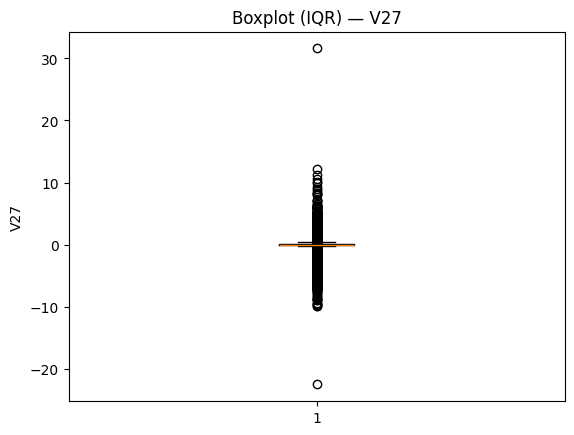

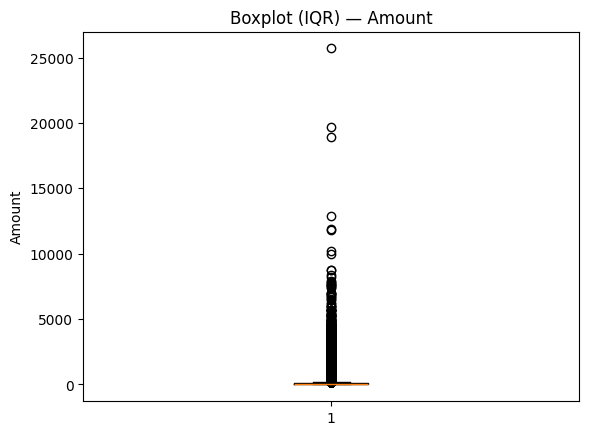

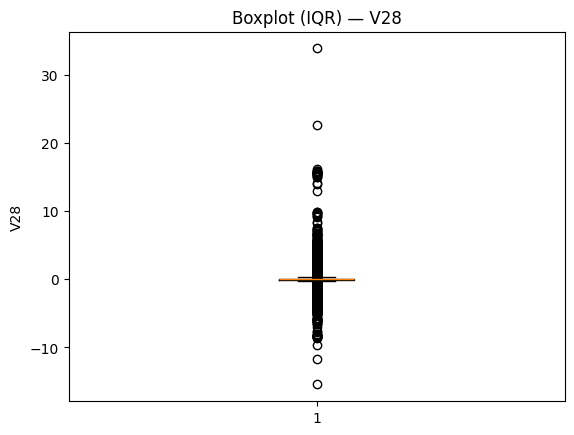

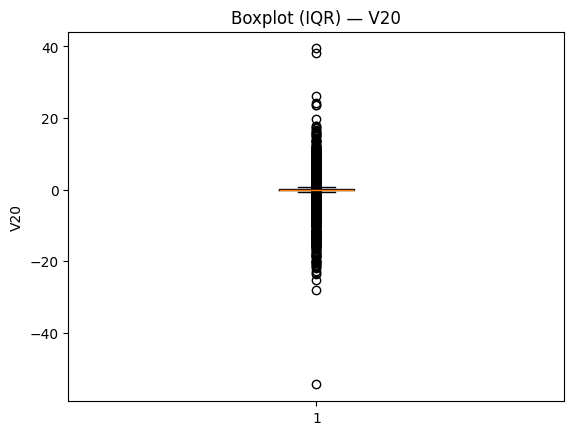

In [15]:
TOP_K = 4

for col in rank.head(TOP_K).index:
    plt.figure()
    plt.boxplot(df[col].dropna().values, vert=True, showfliers=True)
    plt.title(f"Boxplot (IQR) — {col}")
    plt.ylabel(col)
    plt.xlabel("") 
    plt.show()


### Dispersión índice–valor con límites IQR

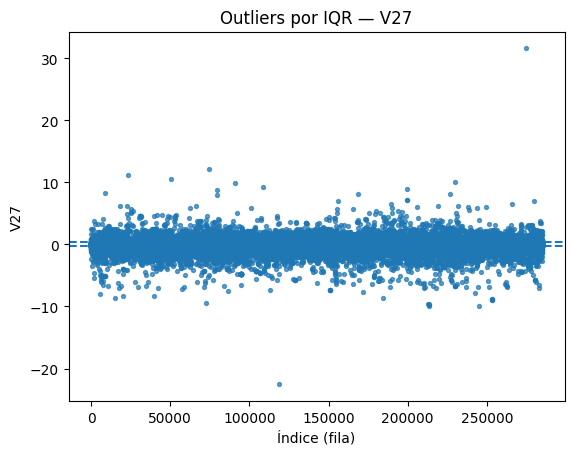

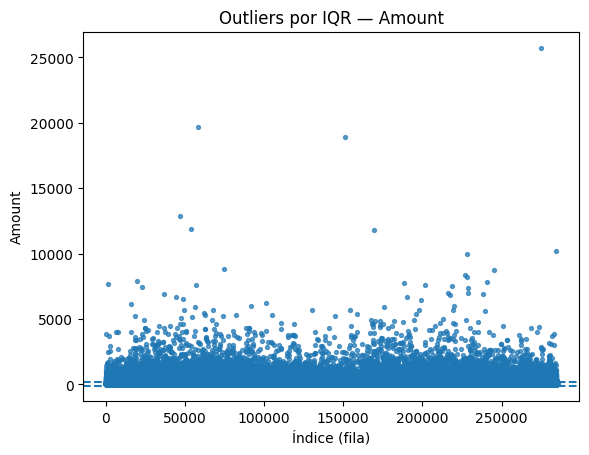

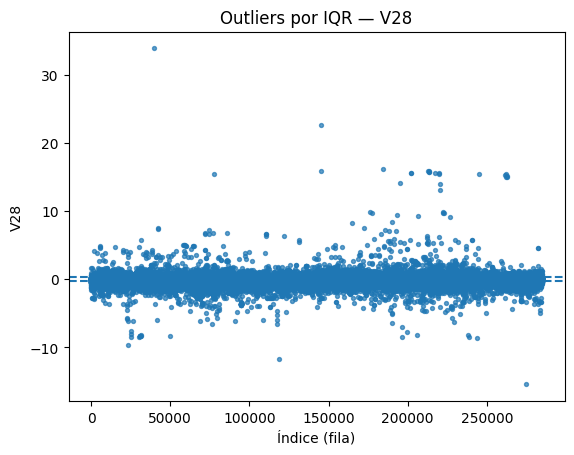

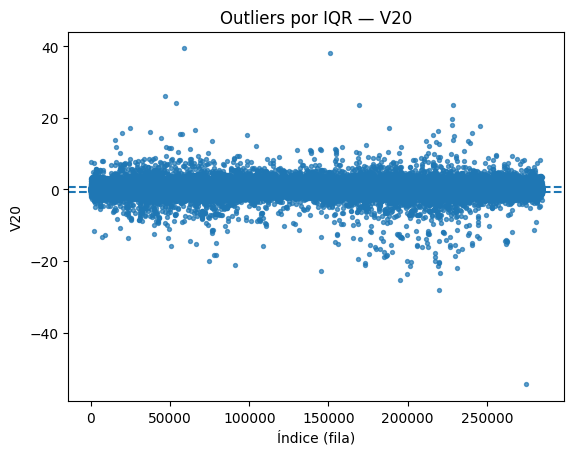

In [16]:
TOP_K = 4
def iqr_bounds(s: pd.Series):
    x = s.dropna().to_numpy()
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return lower, upper

for col in rank.head(TOP_K).index:
    series = df[col].dropna()
    lo, hi = iqr_bounds(series)

    plt.figure()
    plt.scatter(series.index, series.values, s=8, alpha=0.7)
    plt.axhline(lo, linestyle="--")
    plt.axhline(hi, linestyle="--")
    plt.title(f"Outliers por IQR — {col}")
    plt.xlabel("Índice (fila)")
    plt.ylabel(col)
    plt.show()


### PCA 2D

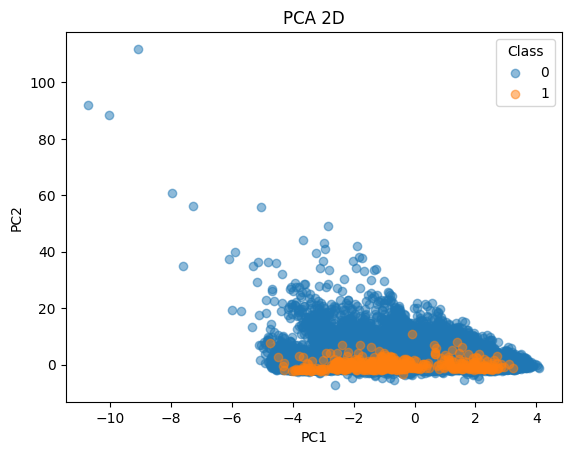

Varianza explicada: [0.08473253 0.07278762]


In [17]:
feat_cols = [c for c in df.columns if c not in [target_col]]
X = df[feat_cols].copy()

X = X.fillna(X.median(numeric_only=True))
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=0)
Xp = pca.fit_transform(Xs)

plt.figure()
for cls_val in sorted(df[target_col].unique()):
    mask = df[target_col] == cls_val
    plt.scatter(Xp[mask, 0], Xp[mask, 1], alpha=0.5, label=str(cls_val))
plt.legend(title="Class")
plt.title("PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Varianza explicada:", pca.explained_variance_ratio_)